# Actividad 3 (Valores Atípicos por Dataframe)
## Luis Javier González Romero - A01702728

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data1 = pd.read_excel('Gastos y costos 20-23.xlsx', sheet_name='2023', skiprows=3)

In [3]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Fecha        397 non-null    datetime64[ns]
 1   Folio        384 non-null    object        
 2   UUID         397 non-null    object        
 3   RFC          397 non-null    object        
 4   Proveedor    397 non-null    object        
 5   TIPO GASTO   389 non-null    object        
 6   Descripción  397 non-null    object        
 7   MP           326 non-null    object        
 8   FP           326 non-null    float64       
 9   TC           397 non-null    float64       
 10  Importe      397 non-null    float64       
 11  IVA          397 non-null    float64       
 12  RET ISR      397 non-null    float64       
 13  RET IVA      397 non-null    float64       
 14  Otros        0 non-null      float64       
 15  TOTAL MX     397 non-null    float64       
 16  TOTAL SA

In [4]:
valores_nulos = data1.isnull().sum()
valores_nulos

Fecha            0
Folio           13
UUID             0
RFC              0
Proveedor        0
TIPO GASTO       8
Descripción      0
MP              71
FP              71
TC               0
Importe          0
IVA              0
RET ISR          0
RET IVA          0
Otros          397
TOTAL MX         0
TOTAL SAT        0
Tipo             0
Status           0
Poliza         115
dtype: int64

## Procesamiento para eliminar valores nulos en dataframe

In [5]:
data1['Folio'] = data1['Folio'].fillna(method='bfill')
data1['TIPO GASTO'] = data1['TIPO GASTO'].fillna(method='ffill')
data1['MP'] = data1['MP'].fillna('P')
poliza = list(data1['Poliza'].mode())
data1['Poliza'] = data1['Poliza'].fillna(poliza[0])
data1['FP'] = data1['FP'].fillna(round(data1['FP'].mean(),1))
data1['Otros'] = data1['Otros'].fillna(0.0)

In [6]:
valores_nulos = data1.isnull().sum()
valores_nulos

Fecha          0
Folio          0
UUID           0
RFC            0
Proveedor      0
TIPO GASTO     0
Descripción    0
MP             0
FP             0
TC             0
Importe        0
IVA            0
RET ISR        0
RET IVA        0
Otros          0
TOTAL MX       0
TOTAL SAT      0
Tipo           0
Status         0
Poliza         0
dtype: int64

<Figure size 1500x800 with 0 Axes>

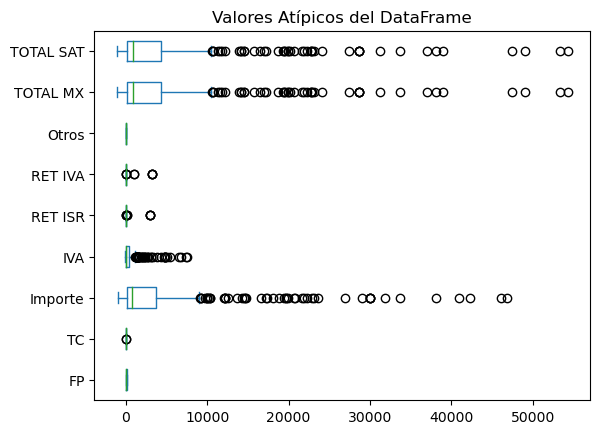

In [7]:
fig = plt.figure(figsize = (15, 8))
data1.plot(kind='box', vert = False)
plt.title('Valores Atípicos del DataFrame')
plt.show()

## Procedimiento 'Desviación Estándar' para eliminar outliers en DataFrame

In [8]:
y = data1.drop(data1.columns[[0,1,2,3,4,5,6,7,17,18,19]], axis=1)
Limite_Superior = y.mean() + 3*y.std()
Limite_Inferior = y.mean() - 3*y.std()
print('Límite superior permitido', Limite_Superior)
print('Límite inferior permitido', Limite_Inferior)

Límite superior permitido FP             173.384206
TC               4.957143
Importe      26557.244156
IVA           3761.774707
RET ISR        931.175004
RET IVA       1022.471745
Otros            0.000000
TOTAL MX     29218.464899
TOTAL SAT    29218.464899
dtype: float64
Límite inferior permitido FP             -85.384206
TC              -2.774030
Importe     -18708.366775
IVA          -2766.954304
RET ISR       -869.142712
RET IVA       -947.124289
Otros            0.000000
TOTAL MX    -20512.146863
TOTAL SAT   -20512.146863
dtype: float64


In [9]:
data2 = data1[(y<=Limite_Superior)&(y>=Limite_Inferior)]
data2

,Fecha,Folio,UUID,RFC,Proveedor,TIPO GASTO,Descripción,MP,FP,TC,Importe,IVA,RET ISR,RET IVA,Otros,TOTAL MX,TOTAL SAT,Tipo,Status,Poliza
0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.0,1.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,NaN,NaN,NaN
1,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.0,1.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,NaN,NaN,NaN
2,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.0,1.0,5551.38,888.22,0.0,0.0,0.0,6439.60,6439.60,NaN,NaN,NaN
3,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.0,1.0,5551.98,888.32,0.0,0.0,0.0,6440.30,6440.30,NaN,NaN,NaN
4,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.0,1.0,8454.37,1352.70,0.0,0.0,0.0,9807.07,9807.07,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,NaN,NaN,NaN
393,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,220.00,0.00,0.0,0.0,0.0,220.00,220.00,NaN,NaN,NaN
394,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1.0,18071.52,682.40,0.0,0.0,0.0,18753.92,18753.92,NaN,NaN,NaN
395,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,1.0,14472.32,0.00,0.0,0.0,0.0,14472.32,14472.32,NaN,NaN,NaN


In [10]:
data3 = data2.drop(data2.columns[[0,1,2,3,4,5,6,7,17,18,19]], axis = 1)
data3

,FP,TC,Importe,IVA,RET ISR,RET IVA,Otros,TOTAL MX,TOTAL SAT
0,44.0,1.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00
1,44.0,1.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00
2,99.0,1.0,5551.38,888.22,0.0,0.0,0.0,6439.60,6439.60
3,99.0,1.0,5551.98,888.32,0.0,0.0,0.0,6440.30,6440.30
4,99.0,1.0,8454.37,1352.70,0.0,0.0,0.0,9807.07,9807.07
...,...,...,...,...,...,...,...,...,...
392,3.0,1.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00
393,1.0,1.0,220.00,0.00,0.0,0.0,0.0,220.00,220.00
394,3.0,1.0,18071.52,682.40,0.0,0.0,0.0,18753.92,18753.92
395,5.0,1.0,14472.32,0.00,0.0,0.0,0.0,14472.32,14472.32


In [11]:
valores_nulos = data3.isnull().sum()
valores_nulos

FP            0
TC            2
Importe      13
IVA          13
RET ISR       4
RET IVA       6
Otros         0
TOTAL MX      9
TOTAL SAT     9
dtype: int64

In [12]:
data_clean = data3.copy()
data_clean = data_clean.fillna(round(data3.mean(), 1))
data_clean

,FP,TC,Importe,IVA,RET ISR,RET IVA,Otros,TOTAL MX,TOTAL SAT
0,44.0,1.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00
1,44.0,1.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00
2,99.0,1.0,5551.38,888.22,0.0,0.0,0.0,6439.60,6439.60
3,99.0,1.0,5551.98,888.32,0.0,0.0,0.0,6440.30,6440.30
4,99.0,1.0,8454.37,1352.70,0.0,0.0,0.0,9807.07,9807.07
...,...,...,...,...,...,...,...,...,...
392,3.0,1.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00
393,1.0,1.0,220.00,0.00,0.0,0.0,0.0,220.00,220.00
394,3.0,1.0,18071.52,682.40,0.0,0.0,0.0,18753.92,18753.92
395,5.0,1.0,14472.32,0.00,0.0,0.0,0.0,14472.32,14472.32


In [13]:
valores_nulos = data_clean.isnull().sum()
valores_nulos

FP           0
TC           0
Importe      0
IVA          0
RET ISR      0
RET IVA      0
Otros        0
TOTAL MX     0
TOTAL SAT    0
dtype: int64

In [14]:
columnas = data1[data1.columns[[0,1,2,3,4,5,6,7,17,18,19]]]
Datos_limpios_std = pd.concat([columnas, data_clean], axis = 1)
Datos_limpios_std= Datos_limpios_std.reindex(columns=[
    'Fecha','Folio','UUID','RFC','Proveedor',
    'TIPO GASTO','Descripción','MP','FP','TC','Importe',
    'IVA','RET ISR','RET IVA','Otros','TOTAL MX',
    'TOTAL SAT','Tipo','Status','Poliza'])
Datos_limpios_std

,Fecha,Folio,UUID,RFC,Proveedor,TIPO GASTO,Descripción,MP,FP,TC,Importe,IVA,RET ISR,RET IVA,Otros,TOTAL MX,TOTAL SAT,Tipo,Status,Poliza
0,2023-01-01,31,49536321-60A4-523E-A32F-E8BDF5C2276E,AAE6411055P8,AESA ARTICULOS ELECTRICOS,COMPRAS,Pago,P,44.0,1.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,P,Vigente,PD02-ENE23
1,2023-01-01,38,20FBB63B-D550-512F-9668-EEC6F983CEB7,AAE6411055P8,AESA ARTICULOS ELECTRICOS,COMPRAS,Pago,P,44.0,1.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,P,Vigente,PD02-ENE23
2,2023-01-01,341932,DB8C4388-D4E0-4F0C-A09C-77C773257F44,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006876 30/36 de 03/12/...,PPD,99.0,1.0,5551.38,888.22,0.0,0.0,0.0,6439.60,6439.60,I,Vigente,PE01-ENE23
3,2023-01-01,341933,A81A63F5-D5EC-4601-803E-375AF9CC5021,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006877 30/36 de 03/12/...,PPD,99.0,1.0,5551.98,888.32,0.0,0.0,0.0,6440.30,6440.30,I,Vigente,PE02-ENE23
4,2023-01-01,342205,DCC10492-DE51-4C87-8430-5676FBF81931,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000009486 5/48 de 03/12/2...,PPD,99.0,1.0,8454.37,1352.70,0.0,0.0,0.0,9807.07,9807.07,I,Vigente,PE03-ENE23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,2023-02-01,882974,3E97C399-6747-4BCA-8436-ED4B0933DF33,BIN940223KE0,"BANCO INVEX, S.A., INSTITUCION DE BANCA MULTIP...",COMISION BANCARIA,COMISIONES E INTERESES,PUE,3.0,1.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,I,Vigente,PD02-ENE23
393,2023-02-01,053560,B7132758-F800-4797-B1D6-CC61AFFEE444,BPU7901018D4,BEBIDAS PURIFICADAS,ALIMENTOS,Epura 20 Lts Policarbonato,PUE,1.0,1.0,220.00,0.00,0.0,0.0,0.0,220.00,220.00,I,Vigente,PD02-ENE23
394,2023-02-01,1092957089,D1E2DC1E-9FFB-46C6-82E4-B350B83CB6F7,BMN930209927,BANCO MERCANTIL DEL NORTE SA INSTITUCION DE BA...,COMISION BANCARIA,SERVICIOS BANCARIOS,PUE,3.0,1.0,18071.52,682.40,0.0,0.0,0.0,18753.92,18753.92,I,Vigente,PD02-ENE23
395,2023-02-01,1453820,6249FE27-6FA6-4EFB-910E-3CD67A0E29A1,EFE8908015L3,EFECTIVALE S. de R.L. de C.V.,GASOLINA,CONSUMOS DE COMBUSTIBLE DE MONEDEROS ELECTRONICOS,PUE,5.0,1.0,14472.32,0.00,0.0,0.0,0.0,14472.32,14472.32,I,Vigente,PD02-ENE23


<Figure size 1500x800 with 0 Axes>

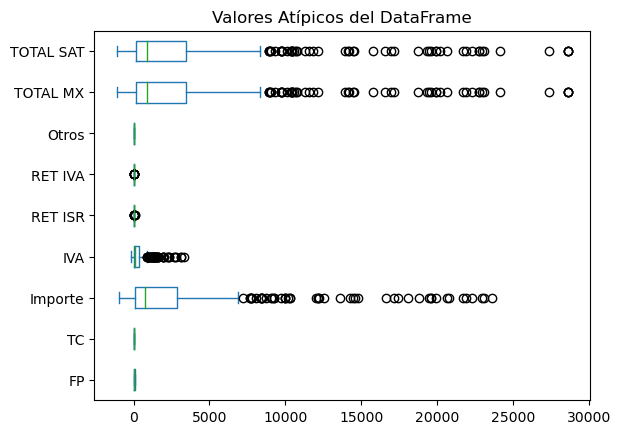

In [15]:
fig = plt.figure(figsize = (15, 8))
Datos_limpios_std.plot(kind='box', vert = False)
plt.title('Valores Atípicos del DataFrame')
plt.show()

In [16]:
Datos_limpios_std.to_csv('Datos_limpios_desviacion.csv')

## Procedimiento 'Cuantiles' para sustituir outliers en DataFrame

In [17]:
y = data3
percentile25 = y.quantile(0.25) #Q1
percentile75 = y.quantile(0.75) #Q3
iqr = percentile75 - percentile25

Limite_Superior_iqr = percentile75 + 1.5*iqr
Limite_Inferior_iqr = percentile25 - 1.5*iqr
print('Límite superior permitido', Limite_Superior_iqr)
print('Límite inferior permitido', Limite_Inferior_iqr)

Límite superior permitido FP            243.00000
TC              1.00000
Importe      7190.16750
IVA           919.85625
RET ISR         0.00000
RET IVA         0.00000
Otros           0.00000
TOTAL MX     8503.49625
TOTAL SAT    8503.49625
dtype: float64
Límite inferior permitido FP           -141.00000
TC              1.00000
Importe     -4159.61250
IVA          -551.91375
RET ISR         0.00000
RET IVA         0.00000
Otros           0.00000
TOTAL MX    -4906.41375
TOTAL SAT   -4906.41375
dtype: float64


In [18]:
data3_iqr = data2[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
data3_iqr

,Fecha,Folio,UUID,RFC,Proveedor,TIPO GASTO,Descripción,MP,FP,TC,Importe,IVA,RET ISR,RET IVA,Otros,TOTAL MX,TOTAL SAT,Tipo,Status,Poliza
0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.0,1.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
1,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.0,1.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
2,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.0,1.0,5551.38,888.22,0.0,0.0,0.0,6439.6,6439.6,NaN,NaN,NaN
3,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.0,1.0,5551.98,888.32,0.0,0.0,0.0,6440.3,6440.3,NaN,NaN,NaN
4,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.0,1.0,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
393,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,220.00,0.00,0.0,0.0,0.0,220.0,220.0,NaN,NaN,NaN
394,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1.0,NaN,682.40,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
395,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,1.0,NaN,0.00,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN


In [19]:
data4_iqr = data3_iqr.drop(data2.columns[[0,1,2,3,4,5,6,7,17,18,19]], axis = 1)
data4_iqr

,FP,TC,Importe,IVA,RET ISR,RET IVA,Otros,TOTAL MX,TOTAL SAT
0,44.0,1.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0
1,44.0,1.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0
2,99.0,1.0,5551.38,888.22,0.0,0.0,0.0,6439.6,6439.6
3,99.0,1.0,5551.98,888.32,0.0,0.0,0.0,6440.3,6440.3
4,99.0,1.0,NaN,NaN,0.0,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
392,3.0,1.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0
393,1.0,1.0,220.00,0.00,0.0,0.0,0.0,220.0,220.0
394,3.0,1.0,NaN,682.40,0.0,0.0,0.0,NaN,NaN
395,5.0,1.0,NaN,0.00,0.0,0.0,0.0,NaN,NaN


In [20]:
valores_nulos = data4_iqr.isnull().sum()
valores_nulos

FP            0
TC            2
Importe      64
IVA          57
RET ISR       9
RET IVA       9
Otros         0
TOTAL MX     63
TOTAL SAT    63
dtype: int64

In [21]:
data5_iqr = data4_iqr.copy()
data5_iqr = data5_iqr.fillna(round(data4_iqr.mean(), 1))
data5_iqr

,FP,TC,Importe,IVA,RET ISR,RET IVA,Otros,TOTAL MX,TOTAL SAT
0,44.0,1.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0
1,44.0,1.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0
2,99.0,1.0,5551.38,888.22,0.0,0.0,0.0,6439.6,6439.6
3,99.0,1.0,5551.98,888.32,0.0,0.0,0.0,6440.3,6440.3
4,99.0,1.0,1244.00,157.40,0.0,0.0,0.0,1444.7,1444.7
...,...,...,...,...,...,...,...,...,...
392,3.0,1.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0
393,1.0,1.0,220.00,0.00,0.0,0.0,0.0,220.0,220.0
394,3.0,1.0,1244.00,682.40,0.0,0.0,0.0,1444.7,1444.7
395,5.0,1.0,1244.00,0.00,0.0,0.0,0.0,1444.7,1444.7


In [22]:
valores_nulos = data5_iqr.isnull().sum()
valores_nulos

FP           0
TC           0
Importe      0
IVA          0
RET ISR      0
RET IVA      0
Otros        0
TOTAL MX     0
TOTAL SAT    0
dtype: int64

In [23]:
columnas = data1[data1.columns[[0,1,2,3,4,5,6,7,17,18,19]]]
Datos_limpios_qua = pd.concat([columnas, data5_iqr], axis = 1)
Datos_limpios_qua= Datos_limpios_qua.reindex(columns=[
    'Fecha','Folio','UUID','RFC','Proveedor',
    'TIPO GASTO','Descripción','MP','FP','TC','Importe',
    'IVA','RET ISR','RET IVA','Otros','TOTAL MX',
    'TOTAL SAT','Tipo','Status','Poliza'])
Datos_limpios_qua

,Fecha,Folio,UUID,RFC,Proveedor,TIPO GASTO,Descripción,MP,FP,TC,Importe,IVA,RET ISR,RET IVA,Otros,TOTAL MX,TOTAL SAT,Tipo,Status,Poliza
0,2023-01-01,31,49536321-60A4-523E-A32F-E8BDF5C2276E,AAE6411055P8,AESA ARTICULOS ELECTRICOS,COMPRAS,Pago,P,44.0,1.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,P,Vigente,PD02-ENE23
1,2023-01-01,38,20FBB63B-D550-512F-9668-EEC6F983CEB7,AAE6411055P8,AESA ARTICULOS ELECTRICOS,COMPRAS,Pago,P,44.0,1.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,P,Vigente,PD02-ENE23
2,2023-01-01,341932,DB8C4388-D4E0-4F0C-A09C-77C773257F44,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006876 30/36 de 03/12/...,PPD,99.0,1.0,5551.38,888.22,0.0,0.0,0.0,6439.6,6439.6,I,Vigente,PE01-ENE23
3,2023-01-01,341933,A81A63F5-D5EC-4601-803E-375AF9CC5021,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006877 30/36 de 03/12/...,PPD,99.0,1.0,5551.98,888.32,0.0,0.0,0.0,6440.3,6440.3,I,Vigente,PE02-ENE23
4,2023-01-01,342205,DCC10492-DE51-4C87-8430-5676FBF81931,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000009486 5/48 de 03/12/2...,PPD,99.0,1.0,1244.00,157.40,0.0,0.0,0.0,1444.7,1444.7,I,Vigente,PE03-ENE23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,2023-02-01,882974,3E97C399-6747-4BCA-8436-ED4B0933DF33,BIN940223KE0,"BANCO INVEX, S.A., INSTITUCION DE BANCA MULTIP...",COMISION BANCARIA,COMISIONES E INTERESES,PUE,3.0,1.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,I,Vigente,PD02-ENE23
393,2023-02-01,053560,B7132758-F800-4797-B1D6-CC61AFFEE444,BPU7901018D4,BEBIDAS PURIFICADAS,ALIMENTOS,Epura 20 Lts Policarbonato,PUE,1.0,1.0,220.00,0.00,0.0,0.0,0.0,220.0,220.0,I,Vigente,PD02-ENE23
394,2023-02-01,1092957089,D1E2DC1E-9FFB-46C6-82E4-B350B83CB6F7,BMN930209927,BANCO MERCANTIL DEL NORTE SA INSTITUCION DE BA...,COMISION BANCARIA,SERVICIOS BANCARIOS,PUE,3.0,1.0,1244.00,682.40,0.0,0.0,0.0,1444.7,1444.7,I,Vigente,PD02-ENE23
395,2023-02-01,1453820,6249FE27-6FA6-4EFB-910E-3CD67A0E29A1,EFE8908015L3,EFECTIVALE S. de R.L. de C.V.,GASOLINA,CONSUMOS DE COMBUSTIBLE DE MONEDEROS ELECTRONICOS,PUE,5.0,1.0,1244.00,0.00,0.0,0.0,0.0,1444.7,1444.7,I,Vigente,PD02-ENE23


<Figure size 1500x800 with 0 Axes>

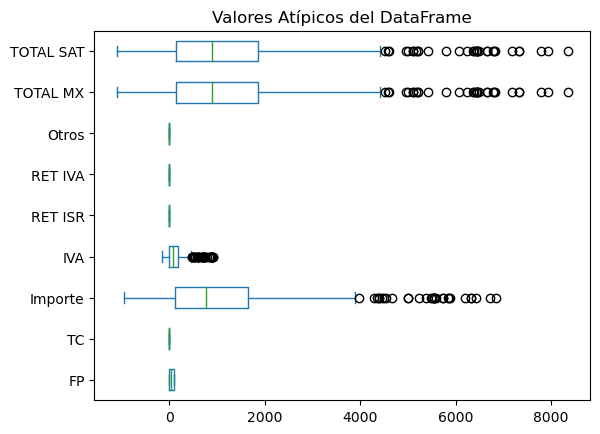

In [24]:
fig = plt.figure(figsize = (15, 8))
Datos_limpios_qua.plot(kind='box', vert = False)
plt.title('Valores Atípicos del DataFrame')
plt.show()

In [25]:
Datos_limpios_qua.to_csv('Datos_limpios_cuantiles.csv')